# **ANALISIS REGRESI LINEAR PADA DATASET BIAYA ASURANSI KESEHATAN PRIBADI**

In [2]:
# Import libraries yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
import seaborn as sns
pyplot.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# **DATASET**

In [3]:
# Muat dataset
df = pd.read_csv('insurance.csv')

# Pisahkan fitur
X = df.drop('charges', axis=1)
y = df['charges']

# Split data menjadi data latih dan data uji dengan proporsi 80 : 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Membaca dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **Statistika Deskriptif**

In [5]:
# show split data shape
print("X_train_shape: ",X_train.shape)
print("X_test_shape: ",X_test.shape)
print("y_train_shape: ",y_train.shape)
print("y_test_shape: ",y_test.shape)

X_train_shape:  (1070, 6)
X_test_shape:  (268, 6)
y_train_shape:  (1070,)
y_test_shape:  (268,)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [9]:
# Ubah data kategorik menjadi numerik
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['sex', 'smoker', 'region']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded_categorical
, columns=encoder.get_feature_names_out(categorical_columns))
df_combined = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

# Tampilkan data baru
(df_combined)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0.0,1.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,0.0,0.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,0.0,0.0,0.0,0.0,1.0


# **Visualisasi**

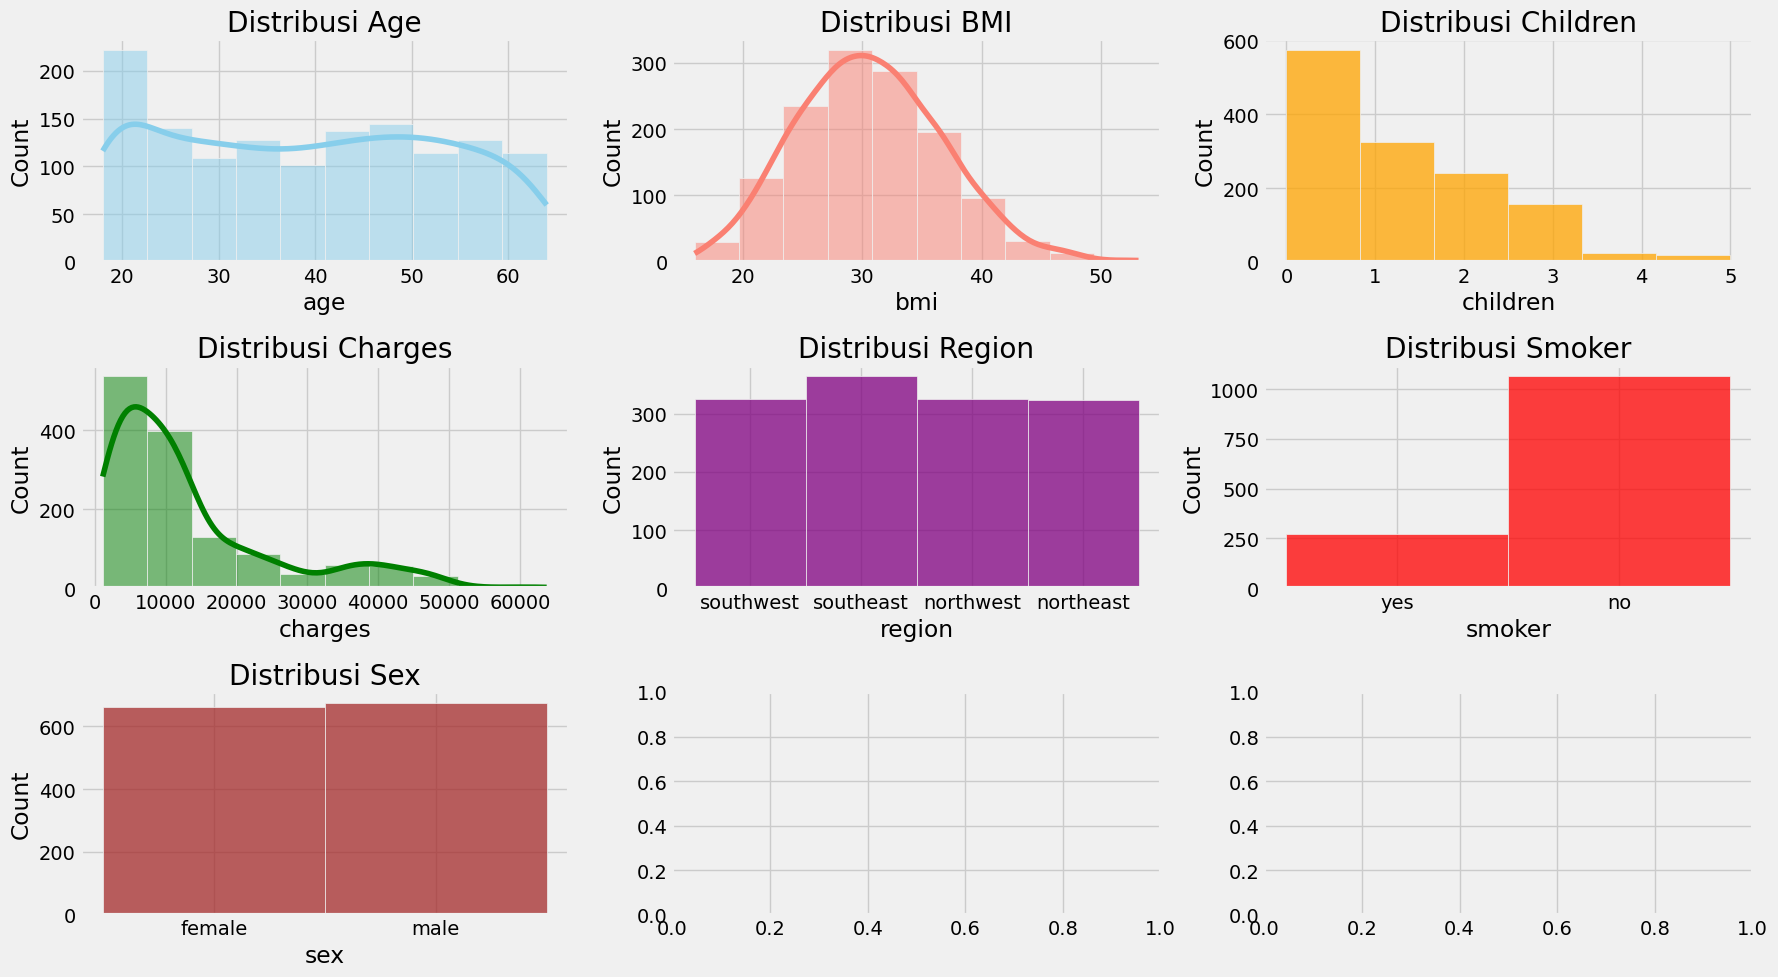

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10))  # 2 rows, 3 columns

# Plot Histogram di setiap subplot
sns.histplot(df['age'], kde=True, bins=10, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Distribusi Age')

sns.histplot(df['bmi'], kde=True, bins=10, color='salmon', ax=axes[0, 1])
axes[0, 1].set_title('Distribusi BMI')

sns.histplot(df['children'], kde=False, bins=6, color='orange', ax=axes[0, 2])
axes[0, 2].set_title('Distribusi Children')

sns.histplot(df['charges'], kde=True, bins=10, color='green', ax=axes[1, 0])
axes[1, 0].set_title('Distribusi Charges')

sns.histplot(df['region'], kde=False, color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Distribusi Region')

sns.histplot(df['smoker'], kde=False, color='red', ax=axes[1, 2])
axes[1, 2].set_title('Distribusi Smoker')

sns.histplot(df['sex'], kde=False, color='brown', ax=axes[2,0])
axes[2, 0].set_title('Distribusi Sex')
# Adjust layout untuk menghindari overlap
plt.tight_layout()

# Tampilkan plot
plt.show()

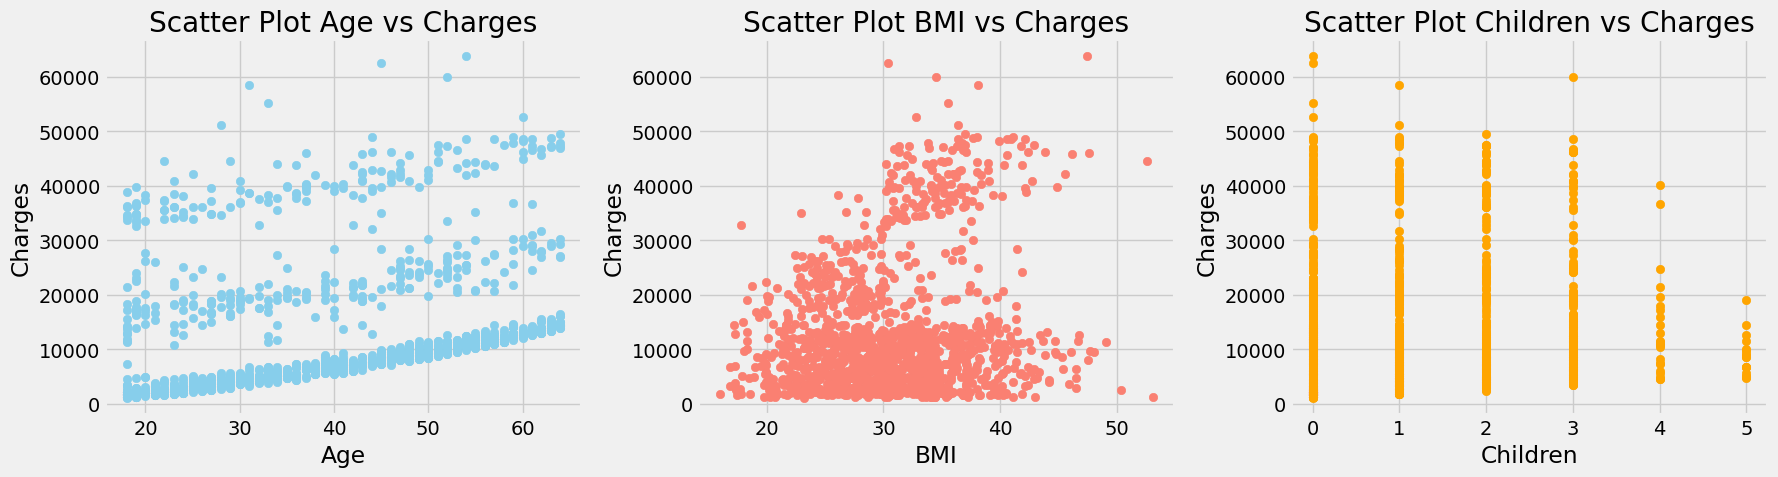

In [11]:
import matplotlib.pyplot as plt

# Setup Subplot: 1 Figure dengan 1 Baris, 3 Kolom
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# Scatter plot Age vs Charges
axes[0].scatter(df['age'], df['charges'], color='skyblue')
axes[0].set_title('Scatter Plot Age vs Charges')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Charges')

# Scatter plot BMI vs Charges
axes[1].scatter(df['bmi'], df['charges'], color='salmon')
axes[1].set_title('Scatter Plot BMI vs Charges')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Charges')

# Scatter plot Children vs Charges
axes[2].scatter(df['children'], df['charges'], color='orange')
axes[2].set_title('Scatter Plot Children vs Charges')
axes[2].set_xlabel('Children')
axes[2].set_ylabel('Charges')

# Mengatur Layout agar tidak saling tumpang tindih
plt.tight_layout()

# Menampilkan Plot
plt.show()


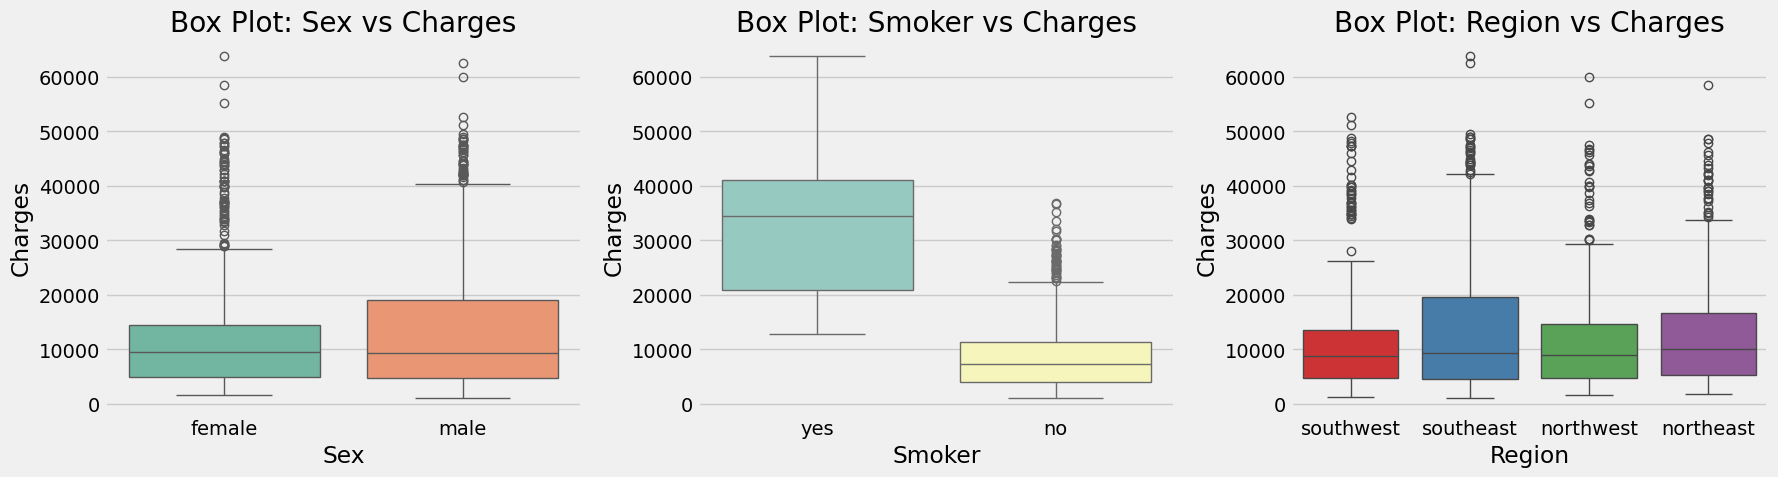

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Subplot: 1 Baris, 3 Kolom
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# Box Plot untuk Sex vs Charges
sns.boxplot(x='sex', y='charges', data=df, ax=axes[0], palette='Set2')
axes[0].set_title('Box Plot: Sex vs Charges')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Charges')

# Box Plot untuk Smoker vs Charges
sns.boxplot(x='smoker', y='charges', data=df, ax=axes[1], palette='Set3')
axes[1].set_title('Box Plot: Smoker vs Charges')
axes[1].set_xlabel('Smoker')
axes[1].set_ylabel('Charges')

# Box Plot untuk Region vs Charges
sns.boxplot(x='region', y='charges', data=df, ax=axes[2], palette='Set1')
axes[2].set_title('Box Plot: Region vs Charges')
axes[2].set_xlabel('Region')
axes[2].set_ylabel('Charges')

# Adjust layout agar rapi
plt.tight_layout()
plt.show()


# Hitung Korelasi menggunakan Heatmap



In [14]:
columns_order = [col for col in df_combined.columns if col != 'charges'] + ['charges']
df_combined = df_combined[columns_order]

# Menghitung Korelasi Antar Semua Variabel
correlation_matrix = df_combined.corr()

# Menampilkan Hasil Korelasi
print("Matriks Korelasi:")
correlation_matrix

Matriks Korelasi:


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
age,1.000000,0.109272,0.042469,-0.020856,-0.025019,-0.000407,-0.011642,0.010016,0.299008
bmi,0.109272,1.000000,0.012759,0.046371,0.003750,-0.135996,0.270025,-0.006205,0.198341
children,0.042469,0.012759,1.000000,0.017163,0.007673,0.024806,-0.023066,0.021914,0.067998
sex_male,-0.020856,0.046371,0.017163,1.000000,0.076185,-0.011156,0.017117,-0.004184,0.057292
smoker_yes,-0.025019,0.003750,0.007673,0.076185,1.000000,-0.036945,0.068498,-0.036945,0.787251
region_northwest,-0.000407,-0.135996,0.024806,-0.011156,-0.036945,1.000000,-0.346265,-0.320829,-0.039905
region_southeast,-0.011642,0.270025,-0.023066,0.017117,0.068498,-0.346265,1.000000,-0.346265,0.073982
region_southwest,0.010016,-0.006205,0.021914,-0.004184,-0.036945,-0.320829,-0.346265,1.000000,-0.043210
charges,0.299008,0.198341,0.067998,0.057292,0.787251,-0.039905,0.073982,-0.043210,1.000000


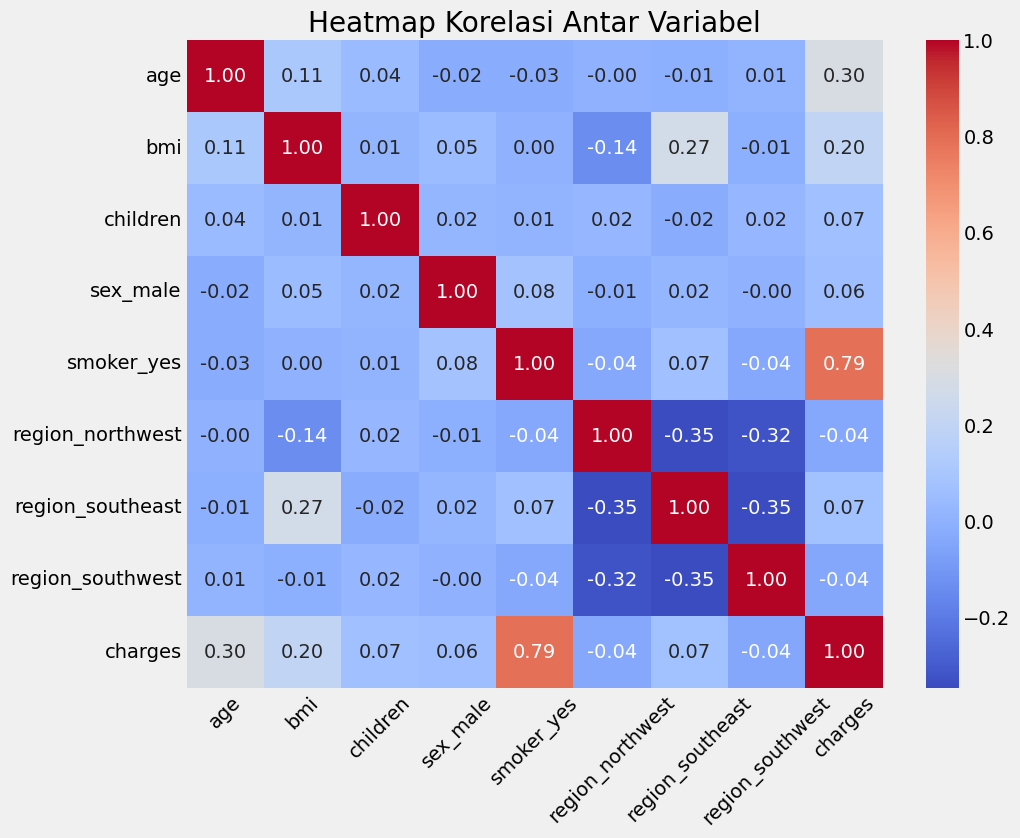

In [15]:
# Visualisasi Heatmap Korelasi
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=45)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

Penjelasan :

Warna merah menyatakan korelasi tinggi yang berarti memiliki hubungan yang signifikan terhadap variabel independen.

Warna biru menyatakan korelasi rendah atau hampir tidak ada korelasi yang berarti variabel tersebut tidak memiliki hubungan yang signifikan terhadap variabel independen


Interpretasi :

Korelasi tertinggi didapatkan antara smoker_yes dan charges memiliki korelasi sebesar 0,79 (korelasi positif tinggi). dan korelasi terendah didapatkan pada region southwest dan charges yaitu sebesar -0,3(hampir tidak ada korelasi).

#**Model Regresi Linear**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Pisahkan Variabel Independen (X) dan Dependen (y)
X = df_combined.drop(columns=['charges'])
y = df_combined['charges']

# 2. Split Data menjadi Training dan Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Bangun Model Regresi Linear
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Prediksi pada Data Testing
y_pred = model.predict(X_test)

# 5. Evaluasi Model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 6. Tampilkan Hasil Evaluasi
print("R-squared:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# 7. Koefisien Model
intercept = model.intercept_
print("Intercept:", intercept)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)


R-squared: 0.7835929767120724
Mean Absolute Error (MAE): 4181.19447375365
Root Mean Squared Error (RMSE): 5796.284659276273
Intercept: -11931.21905032666
            Feature   Coefficient
0               age    256.975706
1               bmi    337.092552
2          children    425.278784
3          sex_male    -18.591692
4        smoker_yes  23651.128856
5  region_northwest   -370.677326
6  region_southeast   -657.864297
7  region_southwest   -809.799354


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.preprocessing import OneHotEncoder

# Gabung varaiabel yang berisikan kategorik dan numerik
numerical_columns = ['age', 'bmi', 'children']
X = pd.concat([df[numerical_columns], encoded_df], axis=1)
y = df['charges']

# Pisahkan kumpulan data menjadi kumpulan pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

formula = 'charges ~ ' + ' + '.join(X.columns)

# Fit Model regrese linier
model = smf.ols(formula=formula, data=pd.concat([X_train, y_train], axis=1)).fit()

# Tampilkan hasil
ols_summary = model.summary()
print(ols_summary)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     380.9
Date:                Sun, 15 Dec 2024   Prob (F-statistic):          1.32e-305
Time:                        15:42:23   Log-Likelihood:                -10845.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1061   BIC:                         2.175e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.193e+04   1114.505  

**Hasil Model Regresi linier berganda**

**Y = -1.193 + 256.9757(x1) + 337.0926(x2) + 425.2788(x3) - 18.5917(x4_male) + 2.365(x5_perokok) - 370.6773(x6_northwest)**


In [20]:
# Membentuk nilai prediksi
prediksi = model.predict(X)
prediksi.head()

,0
0,25197.531061
1,3826.781929
2,6987.535290
3,3813.396616
4,5637.967419


In [21]:
# Membentuk nilai residual
residual = y - prediksi
residual.head()

,0
0,-8312.607061
1,-2101.229629
2,-2538.073290
3,18171.073994
4,-1771.112219


# **Uji Hipotesis**

# Uji F
1. Menentukan hipotesis

*   H0 : Beta1 = Beta2 = 0
*   H1 : minimal ada satu Betaj yang tidak sama dengan 0, dimana j = 1, 2

2. Menentukan tingkat signifikansi
  
  Tingkat signifikansi sebesar 5% atau 0,05

3. Menentukan Uji statistik F

  Pada Hasil perhitungan diatas, didapatkan Nilai P-value sebesar **380.87**

4. Menentukan titik kritis pengujian

  Dengan alpha sebesar 0,05, H0 ditolak jika Fhit > Ftabel dimana F tabel = 2.01 = atau p-Value < 0.05

5. Menentukan Kesimpulan

  Dengan alpha sebesar 0,05, nilai Fhit = 380.87 > Ftabel = 2.01 berdasarkan hal itu maka dapat disimpulkan bahwa **H0 ditolak** yang artinya minimal ada satu variabel independen yang berpengaruh terhadap variabel independennya.

Uji t

1. Menentukan hipotesis

*   H0 : Beta1 = 0
*   H1 : Beta1 tidak sama dengan 0

2. Menentukan tingkat signifikansi

  Tingkat signifikansinya 5% atau alpha sebesar 0.05

3. Menghitung uji t

* Koefisien age: t-statistik = 19.067
* Koefisien bmi: t-statistik = 10.3814
* Koefisien children: t-statistik = 2.7499
* Koefisien sex_male: t-statistik = -0.0494
* Koefisien smoker_yes: t-statistik = 50.6986
* Koefisien region_northwest: t-statistik = -0.6904
* Koefisien region_southeast: t-statistik = -1.2187
* Koefisien region_southwest: t-statistik = -1.5131

4. Menentukan titik kritis pengujian

* Koefisien age: t-statistik = 19.067, p-value = 0.0 -> Tolak H0 (signifikan)
* Koefisien bmi: t-statistik = 10.3814, p-value = 0.0 -> Tolak H0 (signifikan)
* Koefisien children: t-statistik = 2.7499, p-value = 0.0061 -> Tolak H0 (signifikan)
* Koefisien sex_male: t-statistik = -0.0494, p-value = 0.9606 -> Gagal Tolak H0 (tidak signifikan)
* Koefisien smoker_yes: t-statistik = 50.6986, p-value = 0.0 -> Tolak H0 (signifikan)
* Koefisien region_northwest: t-statistik = -0.6904, p-value = 0.4901 -> Gagal Tolak H0 (tidak signifikan)
* Koefisien region_southeast: t-statistik = -1.2187, p-value = 0.2232 -> Gagal Tolak H0 (tidak signifikan)
* Koefisien region_southwest: t-statistik = -1.5131, p-value = 0.1306 -> Gagal Tolak H0 (tidak signifikan)


5. Kesimpulan

* H0 ditolak pada x1(Age) yang berarti variabel memiliki pengaruh signifikan terhadap variabel dependen (charges)
* H0 ditolak pada x2(bmi) yang berarti variabel memiliki pengaruh signifikan terhadap variabel dependen (charges)
* H0 ditolak pada x3(children) yang berarti variabel memiliki pengaruh signifikan terhadap variabel dependen (charges)
* H0 gagal ditolak pada x4(sex_male) yang berarti variabel tidak memiliki pengaruh yang signifikan terhadap variabel dependen(charges)
* H0 gagal ditolak pada x5(smoker_yes) yang berarti variabel tidak memiliki pengaruh yang signifikan terhadap variabel dependen(charges)
* H0 gagal ditolak pada x6(region_northwest) yang berarti variabel tidak memiliki pengaruh yang signifikan terhadap variabel dependen(charges)




In [22]:
# Hitung SSE (Sum of Squared Errors) dan SSR (Sum of Squared Regression)
SSE = np.sum(residual**2)
SSR = np.sum((prediksi - y.mean())**2)
SST = SSR + SSE #SST (Total Sum of Squares)

# Hitung R-squared
r_squared = SSR / SST

print(f"SSE: {SSE}")
print(f"SSR: {SSR}")
print(f"SST: {SST}")
print(f"R-squared: {r_squared}")

# Interpretasi R-squared
print("\nInterpretasi R-squared:")
if r_squared > 0.7 :
  print("Nilai R-squared tinggi, model memiliki ketepatan yang baik dalam memprediksi variabel dependen.")
elif r_squared > 0.4:
  print("Nilai R-squared cukup tinggi, model memiliki ketepatan yang lumayan baik dalam memprediksi variabel dependen.")
elif r_squared > 0.1:
  print("Nilai R-squared rendah, model memiliki ketepatan yang kurang baik dalam memprediksi variabel dependen.")
else :
  print("Nilai R-squared sangat rendah, model tidak memiliki ketepatan yang baik dalam memprediksi variabel dependen.")

SSE: 48891092869.32485
SSR: 145481791509.35077
SST: 194372884378.67563
R-squared: 0.7484675240293516

Interpretasi R-squared:
Nilai R-squared tinggi, model memiliki ketepatan yang baik dalam memprediksi variabel dependen.


In [23]:
# Hitung R-squared yang disesuaikan (Adjusted R-squared)
n = len(y)  # Jumlah observasi
p = X.shape[1]  # Jumlah variabel prediktor

adjusted_r_squared = 1 - ( (1 - r_squared) * (n - 1) / (n - p - 1))
print(f"Adjusted R-squared: {adjusted_r_squared}")

# Interpretasi Adjusted R-squared
print("\nInterpretasi Adjusted R-squared:")
if adjusted_r_squared > 0.7 :
  print("Nilai Adjusted R-squared tinggi, model memiliki ketepatan yang baik dalam memprediksi variabel dependen.")
elif adjusted_r_squared > 0.4:
  print("Nilai Adjusted R-squared cukup tinggi, model memiliki ketepatan yang lumayan baik dalam memprediksi variabel dependen.")
elif adjusted_r_squared > 0.1:
  print("Nilai Adjusted R-squared rendah, model memiliki ketepatan yang kurang baik dalam memprediksi variabel dependen.")
else :
  print("Nilai Adjusted R-squared sangat rendah, model tidak memiliki ketepatan yang baik dalam memprediksi variabel dependen.")

Adjusted R-squared: 0.7469534082973989

Interpretasi Adjusted R-squared:
Nilai Adjusted R-squared tinggi, model memiliki ketepatan yang baik dalam memprediksi variabel dependen.


# **Uji Asumsi**

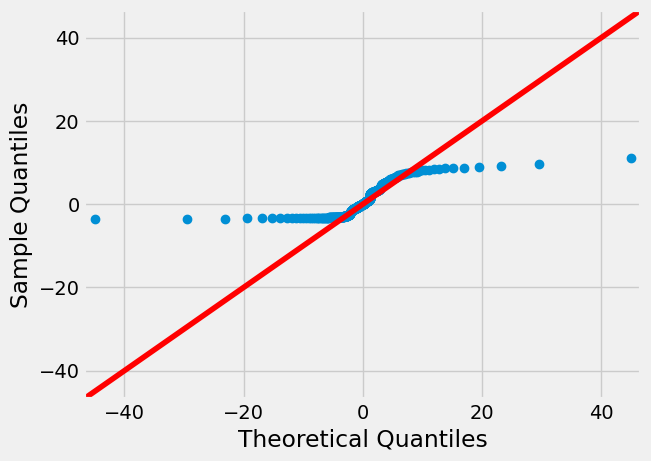

In [24]:
# memeriksa asumsi residual berdistribusi normal

import scipy.stats as stats

fig = sm.qqplot(residual, stats.t, fit = True, line = '45')
plt.show()

Gambar tidak terlihat bahwa distribusi data residual mendekati garis linier. sehingga dapat disimpulkan bahwa data residual tersebut tidak memenuhi asumsi berdistribusi normal.

In [26]:
# Pengujian Jarque Bera untuk memeriksa asumsi residual
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
lzip(name, test)

[('Jarque-Bera', 613.797595322178),
 ('Chi^2 two-tail prob.', 5.194522993944735e-134),
 ('Skew', 1.2527946421204597),
 ('Kurtosis', 5.736685045362781)]

In [27]:
# Memeriksa apakah variabel independen memenuhi asumsi tidak terjadi multikolinieritas.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,feature,VIF
0,age,7.686965
1,bmi,11.358443
2,children,1.809930
3,sex_male,2.003185
4,smoker_yes,1.261233
5,region_northwest,1.890281
6,region_southeast,2.265564
7,region_southwest,1.960745


Berdasarkan hasil diatas, nilai VIF yang lebih tinggi dari 10 hanya ada pada variabel bmi, sedangkan variabel lainnya memiliki nilai VIF yang lebih rendah dari 10. Hal ini mengindikasikan bahwa variabel independen tidak terjadi multikolinieritas


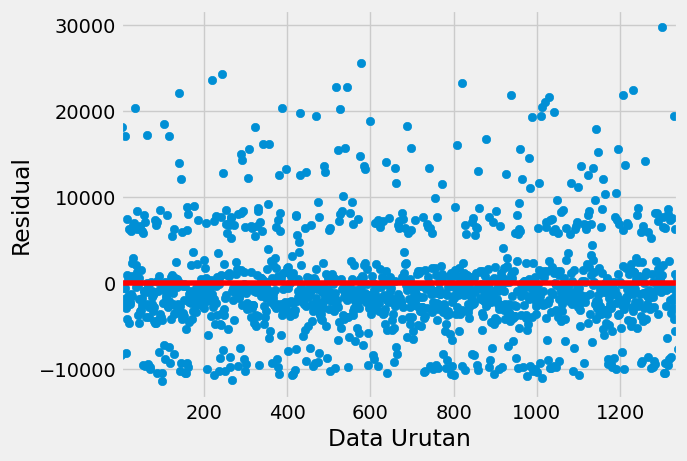

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# memeriksa asumsi residual tidak terjadi autokorelasi
n_residuals = len(residual)
urutan_pengamatan = pd.Series(range(1, n_residuals + 1))

plt.scatter(urutan_pengamatan, residual)
plt.axhline(0, color='red')
plt.xlabel('Data Urutan')
plt.ylabel('Residual')
plt.xlim(1, n_residuals + 1)
plt.show()

In [ ]:
# Durbin Watson
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residual)
print(f"Durbin-Watson : {dw}")

if dw < 1.5:
    print("Ada indikasi autokorelasi positif")
elif dw > 2.5:
    print("Ada indikasi autokorelasi negatif")
else:
    print("Tidak ada indikasi autokorelasi yang signifikan")


Durbin-Watson : 2.0868242790923475
Tidak ada indikasi autokorelasi yang signifikan


Berdasarkan plot residual ini, tidak ada indikasi kuat adanya autokorelasi. Plot menunjukkan pola yang relatif acak dan tidak terstruktur, yang umumnya menunjukkan tidak adanya autokorelasi yang signifikan.

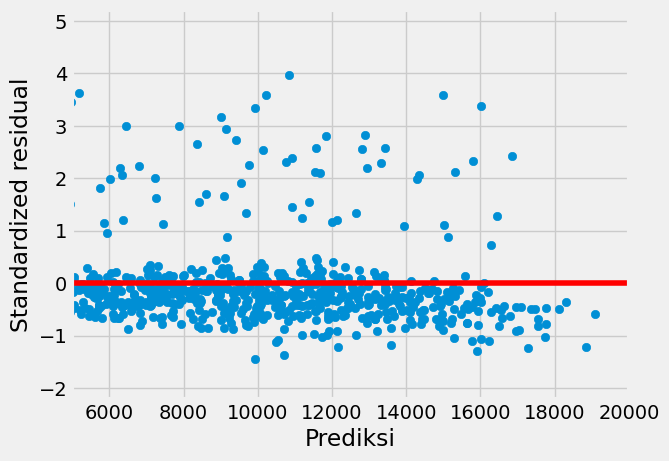

[('Lagrange multiplier statistic', 93.34462547583742),
 ('p-value', 9.720765153202845e-17),
 ('f-value', 12.675741389089819),
 ('f p-value', 1.65386597477402e-17)]

In [28]:
# memeriksa asumsi residual tidak terjadi heteroskedastisitas
influence = model.get_influence()
residual_std = influence.resid_studentized_internal

prediksi = model.fittedvalues

# Scatter Plot
plt.scatter(prediksi, residual_std)
plt.axhline(0, color='red')
plt.xlabel('Prediksi')
plt.ylabel('Standardized residual')
plt.xlim([5000, 20000])
plt.show()

In [1]:
# Pengujian Breush-Pagan
name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)

NameError: name 'sms' is not defined

Karena p-value sangat kecil (mendekati nol), kita menolak hipotesis nol dengan tingkat keyakinan yang sangat tinggi. Ini berarti ada bukti kuat untuk menyimpulkan bahwa terdapat heterokedastisitas dalam model.

